# 7.2: Unsupervised ML Algorithms Comparison

# Discovery and Learning with Big Data/Machine Learning


# NAME: VIJAYA DURGA BANDI - 11601151


# Assignment: A Comparison of Unsupervised and Supervised Machine Learning Algorithms: KMeans, DBSCAN, Isolation Forest, Minimum Covariance Determinant, Local Outlier Factor, and One-Class SVM

Outliers are extreme data values that are distant from other values in your dataset. Outliers can distort the conclusions you draw from descriptive statistics (like mean and standard deviation) and from data visuals (like histograms and scatter plots). Many machine learning algorithms and statistical models are also sensitive to the range and distribution of data values used in your training data. Some of the most common causes of outliers in a dataset include data entry errors (human errors), measurement errors (instrument errors), and data processing errors (data manipulation errors). Consequently, outliers can come from multiple sources and hide in a single feature or n-dimensional feature space. Aside from the specific task of investigating these extreme data values (for anomaly detection) or in the case of naturally occurring outliers (novelties), the goal is often to remove or ignore outliers in your analysis.



CRIM is the per capita crime rate by town.

ZN is the proportion of residential land zoned for lots over 25,000 sqft.

INDUS is the proportion of non-retail business acres per town.

CHAS is Charles River dummy variable (equals 1 if tract bounds river; 0 otherwise).

NOX is nitric oxides concentration (parts per 10 million).

RM is the average number of rooms per dwelling.

AGE is the proportion of owner-occupied units built prior to 1940.

DIS is weighted distances to five Boston employment centers.

RAD is an index of accessibility to radial highways.

TAX is full-value property-tax rate per 10,000 dollars.

PTRATIO is the pupil-teacher ratio by town.

B is 1000(Bk - 0.63)^2 where Bk is the proportion of Black individuals by town.

LSTAT is % lower status of the population.

MEDV is the Median value of owner-occupied homes in 1000 dollars.

# Importing the required basic Libraries

# The code imports necessary libraries and modules for data manipulation, visualisation, and machine learning. It prepares the environment for modelling and data analysis. It specifically imports scikit-learn modules for various machine learning tasks like regression, data scaling, feature engineering, and outlier detection using DBSCAN and Z-score in addition to pandas and numpy for handling data, seaborn, and matplotlib for data visualisation.
pandas and numpy: These are basic libraries for data manipulation and statistical computation. It is mostly used to manipulate structured data in the form of DataFrames and arrays.

scatter_matrix from pandas.plotting: This function is used to create scatter plots against each other for all numeric lines in the DataFrame. It helps to visualize relationships and relationships between different things.

seaborn: This library is built on top of matplotlib and provides a high level interface for creating interesting and informative numerical visualizations. By setting sns.set(color_codes=True), seaborn is configured to use its default color palette for plotting.

matplotlib.pyplot: This is a powerful library for creating various types of plot graphics.

Machine Learning Libraries:

train_test_split from sklearn.model_selection: This is used to split the training and test set dataset for model analysis.
ColumnTransformer from sklearn.compose: This class is useful for preprocessing steps for applying columns to a data structure.
Pipeline from sklearn.pipeline: Allows you to combine multiple preprocessing steps and machine learning models into a single unit.
PolynomialFeatures from sklearn.preprocessing: This is used to create polynomial features from the original features to capture nonlinear relationships in the data.
StandardScaler and MinMaxScaler from sklearn.preprocessing: These are used to sort numeric data at specific locations, respectively.
OneHotEncoder from sklearn.preprocessing: One hot encoding is used for class objects to fit machine learning models.
LinearRegression from sklearn.linear_model: This is a linear regression model used for regression functions.
mean_squared_error and r2_score from sklearn.metrics: These are the analytical metrics for the regression models.
Background Introduction:

DBSCAN from sklearn.cluster: Used to identify noisy regions and cluster data points based on density.
NearestNeighbors from sklearn.neighbors: This is used to calculate the distance from each node to its nearest neighbor, which is useful for DBSCAN.
stats from scipy: Provides various statistical functions, including the Z-score function for identifying outliers in data.
The below code has the libraries that are needed for data analysis, data visualization, data preprocessing, and regression modeling including machine learning It also includes functionality for scaling data, encoding categorical variables, clustering and finding outliers using statistical methods.

In [3]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix


import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

#Import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Identify Noise Points from DBSCAN
from sklearn.cluster import DBSCAN

# Calculate the distance from each point to its closet neighbor 
from sklearn.neighbors import NearestNeighbors

# Use the Z-score function in Scipy library to detect outliers
from scipy import stats

# Loading the Data Set

# Load the data from sklearn
# Specify location of the dataset.  
The pd.read_csv() function from the pandas library is being used in the code block to read the Boston housing dataset from the specified file location. Housing Boston.csv can be found at the following path: "C:UsersvijayDownloads". After that, the data is loaded into housingfile, a pandas DataFrame that can be used for additional data analysis and manipulation.

In [17]:
# Load the data from sklearn
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!
housingfile = ("housing boston.csv")


# Load the data into a Pandas DataFrame
The code block loads the data into a Pandas DataFrame called df from the housingfile file that has been specified. Header=None tells the DataFrame to use default column names because the dataset doesn't have a header row. The first few rows of the DataFrame are then shown, giving a preview of the loaded data, using the df.head() function. #The code displays the first few lines of the DataFrame df using the head() function. It provides an overview of the data, showing the column values ​​of the first five rows and their corresponding values

In [19]:
# Load the data into a Pandas DataFrame
df= pd.read_csv (housingfile, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Creating the Column Names
The code block defines a list called col_names that holds the dataset's column names. These names represent the various features or attributes of the data, such as crime rate (CRIM), proportion of residential land zoned for large lots (ZN), industrial proportion (INDUS), Charles River dummy variable (CHAS), nitric oxides concentration (NOX), average number of rooms per dwelling (RM), age of the property (AGE), weighted distances to five Boston employment centers (DIS), index of accessibility to radial highways (RAD), full-value property-tax rate per (Dollars-10,000) (TAX), pupil-teacher ratio (PTRATIO), the percentage of African American population (AA), percentage of lower status population (LSTAT), and the median value of owner-occupied homes in (Dollars-10,000) (MEDV).
When the dataset is loaded or processed, these column names will be used to label the corresponding columns in the DataFrame.

In [21]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

# Let's check to see if the column names were added
The code block is assigning the list col_names containing the column names to the df.columns attribute of the DataFrame df. By doing this, it explicitly sets the column names of the DataFrame to match the names provided in the col_names list. The df.head() function is then used to display the first few rows of the DataFrame with the updated column names. This allows us to verify if the column names have been added correctly to the DataFrame as shown in the below output.


In [24]:
df.columns = col_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Label X & Y Columns
The Pandas DataFrame df here is being changed into a NumPy array named array in the code below. For machine learning modelling, it then divides the array into input (X) and output (Y) components. The entire array's first 13 columns (indexed 0 to 12) and all of its rows, which represent the features, are included in the input X. We know that it duplicates the input data, the output y contains all of the rows and the first 13 columns of the array. Instead, slicing array[:, 13] should be used to choose all rows as well as just the final column (index 13), which represents the target variable (MEDV).

In [27]:
 array = df.values

# Separate the array into input and output components by slicing
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:13]

# For Y (output) [:3] --> All the rows in the last column (MEDV)
y = array [:,:13]

# Extreme Value Analysis
With extreme value analysis, you can use scatterplots, histograms, or box plots to look for extreme values. You focus on visualizing the data and looking for values more than 2 or 3 standard deviations from the mean. You will create a boxplot and calculate the Z-score and IQR for a comparison of the machine learning algorithms.

# Creating a Scatter Plot
The code block below uses Matplotlib to create a scatter plot to show the relationship between the average number of rooms per dwelling ('RM') and the percentage of the population with lower socioeconomic status ('LSTAT') on the x-axis. With the proper labels and captions, the plot is established. The plot is also displayed and saved as an image file by the code. The bottom left and bottom centre data points are also highlighted, indicating that they are probably outliers because they are far from the majority of the other data points and are therefore highlighted. The output of the code defines a scatter plot that represents the relationship between the average number of rooms per dwelling (RM) and the percentage of the population with lower status (LSTAT). With 'LSTAT' values plotted on the x-axis and 'RM' values plotted on the y-axis, each data point in the plot represents a different observation in the dataset.The distribution and pattern of these two variables can be seen more clearly with the help of the scatter plot. The highlighted data points at the bottom left and bottom centre suggest potential outliers because they differ significantly from the majority of the other data points in the plot. Regarding the existence of outliers in the dataset, the caption and figure text both offer additional information.

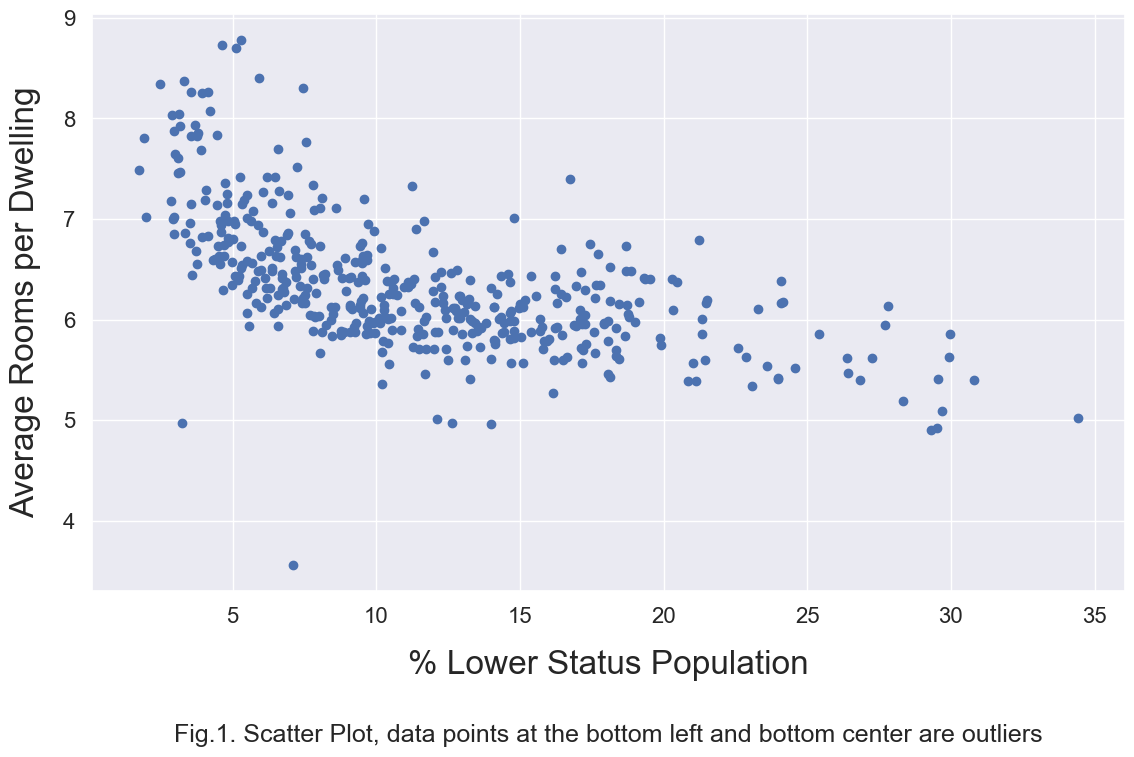

In [29]:
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(df['LSTAT'], df['RM'])

# Add labels
ax.set_xlabel('% Lower Status Population', size=24, labelpad=16)
ax.set_ylabel('Average Rooms per Dwelling', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Scatter Plot, data points at the bottom left and bottom center are outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-scatter-plot.png', bbox_inches='tight')

# Show plot
plt.show(); 

# Plot highlights a few data points far away from most of the other points.
# These data points (at the bottom left and bottom center) are likely  to be outliers.

# Creating a box plot
For analysing the distribution of the 'LSTAT' (percentage of lower status population) variable, we are using the Matplotlib to create a box plot. The box plot shows the data's median, quartiles, and possible outliers. It draws attention to three data points that are higher than 30, indicating that they are outliers because they are outside the interquartile range, which contains the majority of the observations.

It is simple to spot outliers and skewness in the distribution thanks to the box plot's clear visualisation of the data's central tendency and spread. Additional details about the existence of outliers and the goal of the box plot are provided in the figure caption and figure text. The box plot that depicts the distribution of the dataset's "LSTAT" (percentage of lower status population) variable is defined by the code's output. The central tendency, variability, and potential outliers of the data are all summarised visually in the box plot.

Understanding the Box Plot
The middle 50% of the data is represented by the box, which is the interquartile range (IQR).
The median value is indicated by the line inside the box.
The "whiskers" extend from the box's edges to the minimum and maximum values inside of a particular range (specified by the whis parameter, which is currently set to 1.5).
Data points outside of the whiskers are plotted as individual points because they may be outliers. Three of the data points above 30 in this particular plot are outside the bounds of the distribution, which may be an indication of an outlier. A slight right skewness in the data is also visible in the box plot due to the box's slight skewness towards the plot's lower end.

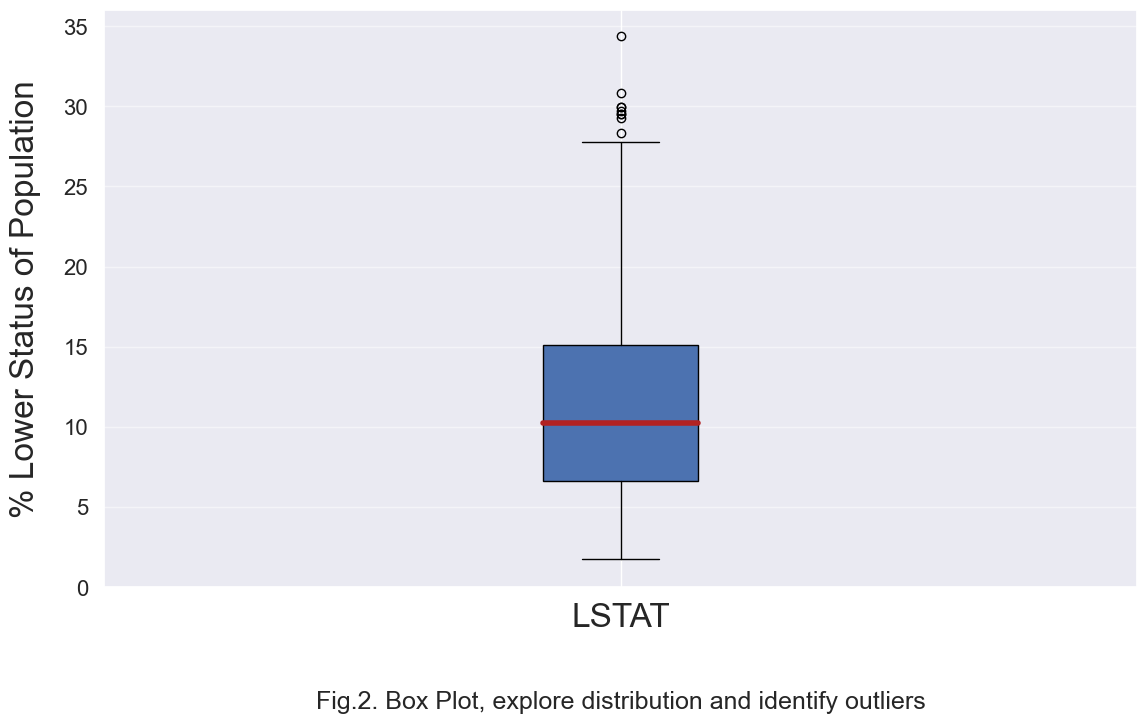

In [30]:
fig,ax = plt.subplots(figsize=(13.33, 7.5))
medianprops = dict(linestyle='-', linewidth=4, color='firebrick')
bp = plt.boxplot(df['LSTAT'], vert=1, whis=1.5, patch_artist=True, medianprops=medianprops)

ax.yaxis.grid(True, linestyle='-', which='major', alpha=0.5)
ax.set_ylabel('% Lower Status of Population', size=24, labelpad=16)
ax.set_ylim(bottom=0)
xtickNames = plt.setp(ax, xticklabels=['LSTAT'])
plt.setp(xtickNames, size=16)
plt.tick_params(axis='x', labelsize=24, length=8)
plt.tick_params(axis='y', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Box Plot, explore distribution and identify outliers"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.2, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig("fig" + str(fignum) + '-outlier-box-plot.png', bbox_inches='tight')

plt.show();

# Plot highlights three data points above 30, with minor right skew
# These data points are outliers as they are not included in the box of other observations.

# Creating a Histogram and Density Plots
The code block generates a kernel density estimation (KDE) plot and a histogram for the dataset's 'RM' (average rooms per dwelling) feature. The first subplot (ax[0]) of the histogram shows the frequency distribution of the "RM" values, and the second subplot (ax[1]) displays the KDE curve, which calculates the underlying probability density function.

The Gaussian kernel density estimation method with an optimised bandwidth is used to generate the KDE plot. Additionally, the code adds vertical dashed lines to the plots along with appropriate titles and captions at the median and mean values of the 'RM'. The output plot helps in visualising the distribution of the 'RM' feature, which appears to be roughly normally distributed but with a slight right skew based on the histogram and KDE curve. Although the presence of outliers is determined, neither the KDE curve nor the histogram clearly show any outliers.The output plot helps in visualising the distribution of the 'RM' feature, which appears to be roughly normally distributed but with a slight right skew based on the histogram and KDE curve. Although the presence of outliers is determined, neither the KDE curve nor the histogram clearly show any outliers.The distribution of the dataset's 'RM' (average rooms per dwelling) feature is shown in the output plot. It has two subplots: the first shows a histogram of the frequency distribution of the 'RM' values, and the second displays a kernel density estimation (KDE) curve that calculates the probability density function underneath. Based on the histogram and KDE curve, the plot infers that the 'RM' feature is roughly normally distributed with a slight right skew, and no obvious outliers are visible.

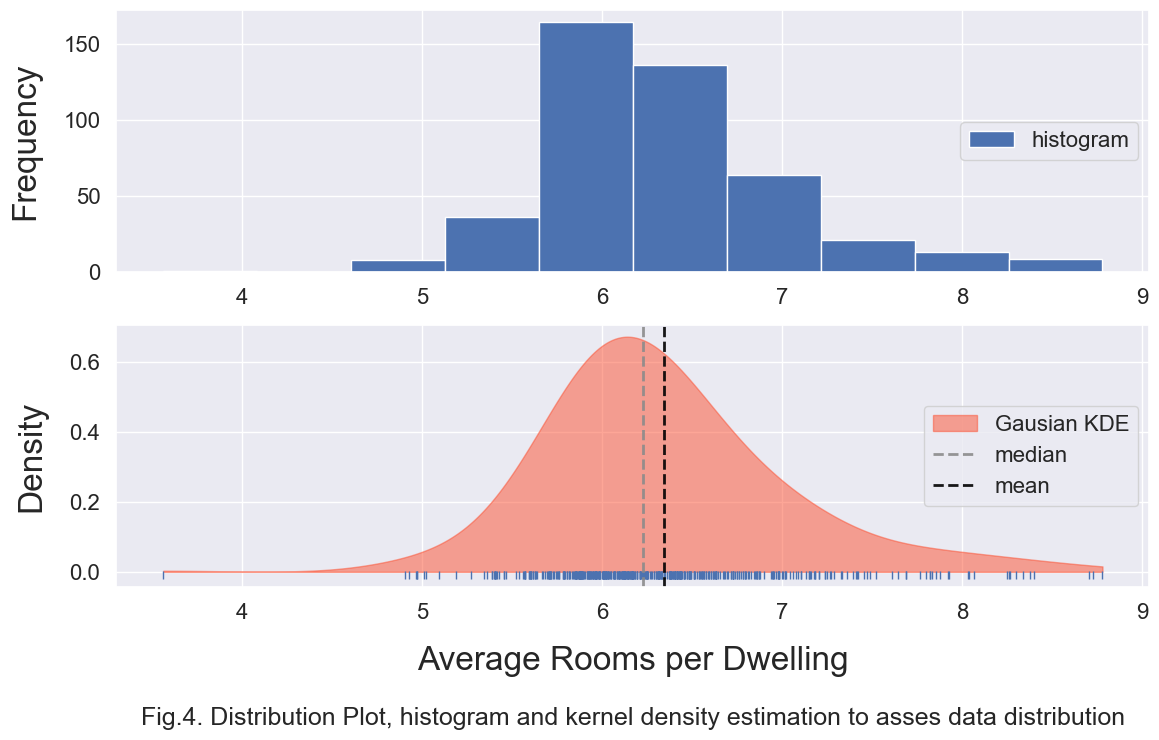

In [36]:
# Create a historm plot
fig,ax = plt.subplots(2, figsize=(13.33, 7.5))

# Get series for a single feature x
xi = df['RM'].values

# Create histogram
# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
ax[0].hist(xi, bins=10, label='histogram')

# Use Gaussian rule-of-thumb to attempt to find a nearly optimal smoothing length
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from sklearn.neighbors import KernelDensity # as opposed to from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV, LeaveOneOut # use GridSearchCV to optimize bandwidth 
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.resize(xi, (len(xi), 1)))
kde = KernelDensity(bandwidth=list(grid.best_params_.values())[0], kernel='gaussian')
kde.fit(np.resize(xi, (len(xi), 1)))

xd = np.linspace(xi.min(), xi.max(), len(xi))
logprob = kde.score_samples(np.resize(xd,(len(xd), 1))) # score_samples returns the log of the probability density

ax[1].fill_between(xd, np.exp(logprob), color='#fc4f30', label="Gausian KDE", alpha=0.5)
ax[1].plot(xi, np.full_like(xi, -0.01),'|', markeredgewidth=1)

ax[1].axvline(np.median(xi), color='#8b8b8b', linestyle='dashed',
            linewidth=2.0, label='median', alpha=0.9)
ax[1].axvline(np.mean(xi), color='black', linestyle='dashed',
            linewidth=2.0, label='mean', alpha=0.9)

# Add labels
ax[0].set_ylabel('Frequency', size=24, labelpad=16)
ax[1].set_ylabel('Density', size=24, labelpad=16)
ax[1].set_xlabel('Average Rooms per Dwelling', size=24, labelpad=16)
ax[0].tick_params(axis='both', labelsize=16, length=8)
ax[1].tick_params(axis='both', labelsize=16, length=8)
ax[0].legend(loc='center right', fontsize=16)
ax[1].legend(loc='center right', fontsize=16)

# Add caption
fignum += 1
figtxt = ". Distribution Plot, histogram and kernel density estimation to asses data distribution"
figcap = "Fig." + str(fignum) + figtxt
ax[1].text(0.5, -0.5, figcap, fontsize=18, ha='center', va='center', transform=ax[1].transAxes)
plt.savefig('fig' + str(fignum) + '-outlier-histogram-kde.png', bbox_inches='tight')

plt.show();

# Plot appears to be normally distributed, with right skew as mode < mean
# No clear outliers visible from histogram or KDE

We can compare the kernel density estimate of x_point to the average kernel density estimate overall values in X_feature. The equation would then flag x_point if its outlier score fell below some defined threshold.

# Calculating the Z-score
The Z-score function from the Scipy library is used in the code block to determine the Z-scores for each data point in the DataFrame df. The Z-score calculates how far a data point deviates from the median of a particular feature. Data points with high absolute Z-scores (typically greater than a threshold value like 2 or 3) are considered to be outliers, so by calculating Z-scores for all the features in the dataset, the code enables the detection of potential outliers. The printed Z-score matrix z displays the Z-scores for every data point and feature in the resulting DataFrame. The DataFrame df's Z-scores for each data point and feature are defined in a matrix as the output. The number of standard deviations that a data point deviates from the mean of each feature is represented by each element in the matrix. While values close to 0 indicate data points close to the mean, high absolute Z-scores (typically greater than a threshold like 2 or 3) indicate potential outliers.

In [31]:
# Use the Z-score function in Scipy library to detect outliers
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.567361  0.217241  1.177523  0.289712  0.024767  0.347505  0.012741   
1    0.558942  0.523527  0.476449  0.289712  0.631681  0.116298  0.474875   
2    0.558950  0.523527  0.476449  0.289712  0.631681  1.263325  0.158670   
3    0.556912  0.523527  1.196670  0.289712  0.728436  0.982574  0.703233   
4    0.542200  0.523527  1.196670  0.289712  0.728436  1.206274  0.404257   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.544775  0.523527  0.239354  0.289712  0.283089  0.374529  0.126070   
448  0.551738  0.523527  0.239354  0.289712  0.283089  0.335607  0.396572   
449  0.545525  0.523527  0.239354  0.289712  0.283089  0.949544  0.905543   
450  0.525939  0.523527  0.239354  0.289712  0.283089  0.676299  0.845036   
451  0.550879  0.523527  0.239354  0.289712  0.283089  0.470728  0.542500   

          DIS       RAD       TAX   PTRATIO        AA     LSTAT      MEDV  

The code below establishes a threshold value of 3 for identifying outliers based on the previously computed Z-scores in the matrix z. A tuple of arrays is returned by the np.where(z > 3) function. Where the Z-scores exceed the threshold (3), the row numbers are contained in the first array, and the corresponding column numbers are contained in the second array. It is easy for us to recognise the outlier data points and their corresponding features, which represent the locations of potential outliers in the DataFrame df. Based on the previously calculated Z-scores, the output specifies the locations (row and column indices) of potential outliers in the DataFrame df. The np.where(z > 3) function specifically returns two arrays: the first array contains the row indices, and the second array contains the column indices, indicating the potential outlier data points and their corresponding features where the Z-scores exceed the threshold of 3.

In [32]:
## Set a threshold to identify an outlier
threshold = 3
print(np.where(z > 3))

# First array contains the list of row numbers 
# Second array respective column numbers

(array([  8,  48,  55,  57, 102, 141, 142, 152, 154, 155, 155, 156, 160,
       162, 163, 163, 199, 200, 203, 204, 208, 209, 210, 211, 212, 216,
       218, 219, 220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273,
       274, 276, 277, 282, 283, 283, 284, 351, 352, 353, 353, 354, 355,
       356, 356, 357, 358, 363, 364, 364, 365, 368, 369, 370, 371, 372,
       373, 382, 382, 383, 386, 387, 388, 389, 389, 390, 391, 392, 393,
       394, 396, 398, 399, 401, 405, 405, 406, 407, 408, 417], dtype=int64), array([12, 12,  1,  1, 11, 12,  3,  3,  3,  3, 11, 11,  3,  3,  3,  5,  1,
        1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,
        1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  7,  7,  1,  7,  7,
        7,  0,  3,  3,  3,  3,  3,  5,  5,  3,  3,  0,  3,  0,  0,  0, 12,
        0, 11, 11, 11,  0, 11, 11, 11, 11,  0,  0,  0,  0,  0, 11,  0, 11,
       11, 11, 11, 11], dtype=int64))


# Calculate IQR
The code block below calculates the interquartile range (IQR) for each feature in the DataFrame df. The IQR is a measure of statistical spread and represents the distance between the first quartile (Q1, 25th percentile) and third quartile (Q3, 75th percentile) By calculating the IQR for each item, the code quantifies the spread and provides insight into the variability in the dataset. The resulting iqr variable contains the IQR value of each element in the DataFrame and is printed to display the results. The interquartile range (IQR) of each feature in the DataFrame df is shown in the output. The interval or gap between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) of the data for each trait is represented by each item with the resulting iqr change IQR is a statistical spread measure that provides information about variability in data for each feature.

In [33]:
# Calculate interquartile range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

CRIM         1.141585
ZN          20.000000
INDUS       13.170000
CHAS         0.000000
NOX          0.158000
RM           0.708250
AGE         50.675000
DIS          3.046350
RAD          3.000000
TAX        134.250000
PTRATIO      3.400000
AA          18.440000
LSTAT        8.517500
MEDV         8.100000
dtype: float64


The code block below is performing the outlier detection for each data point in the DataFrame df based on the interquartile range (IQR) method. It also creates a new DataFrame containing True for data points that are considered outliers and False for data points that are in an acceptable range (not outliers). The condition for identifying outliers is that the data point of any feature falls below q1 - 1.5 * iqr (lower bound) or greater than q3 + 1.5 * iqr (upper bound) The resulting DataFrame displays the outliers for each data point in the data set.The presence of outliers for each data point in the original DataFrame df is shown in the output DataFrame. A boolean value (True or False) is assigned to each element in the output DataFrame, where True denotes an outlier and False denotes a non-outlier for the corresponding data point. The interquartile range (IQR) method is the foundation for the outlier detection, which uses a threshold of 1.5 times the IQR to find potential outliers.

In [34]:
# Locate all outliers
pd.DataFrame(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))

# False means the values are valid
# True indicates presence of an outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,False,False,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# nalyze Using KMeans
K-means algorithm is an iterative algorithm that tries to partition the data into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The way k-means clustering follows these steps:

Specify the number of clusters K
Initialize centroids to shuffle and randomly select K data points without replacement
Compute the sum of squared distance between data points and all centroids
Assign each data point to the closest cluster (centroid)
Computer the centroids for the clusters by taking the average of all the data points that belong to each cluster
Iterate until there is no change to the centroids
From this dataset, we need to calculate some patterns, as we want to use an unsupervised method, so we won't know what to calculate exactly. This is where the domain expert will be very beneficial as he/she can look at the clusters created and help to explain the clusters.

# Find the optimal K value using the Elbow Plot to specify the number of clusters (K)
The code block performs KMeans clustering on a subset of the attributes ('TAX' and 'DIS') from the DataFrame df. It uses MinMaxScaler to evaluate the data and then plots the sum of the squared differences for values ​​of K (from 1 to 9) to find the optimal value (number of clusters) of K. Plot No. is determined by placing an "elbow" point. in the optimal value of K . The relationship between the large number of clusters (K) and the sum of squared distances within each cluster can be seen in the output plot. In order to determine the most reliable K fee for KMeans clustering, it is used. The plot shows that the sum of squared distances tends to decrease as K increases, but there may be an awesome "elbow" factor at K=3, indicating that adding more clusters beyond this point does not significantly improve clustering performance. As a result, three is determined to be the final K value for this dataset. The code block makes use of the warnings module to suppress particular types of warnings while the code is being executed. The two strains are warned about.Filter warnings (with the keyword "forget about" and the category FutureWarning).Python is taught to ignore any FutureWarning and UserWarning that pop up while navigating the code by the filterwarnings("ignore", class=UserWarning"). By correctly suppressing them during code execution, this stops those warning messages from being displayed in the output.

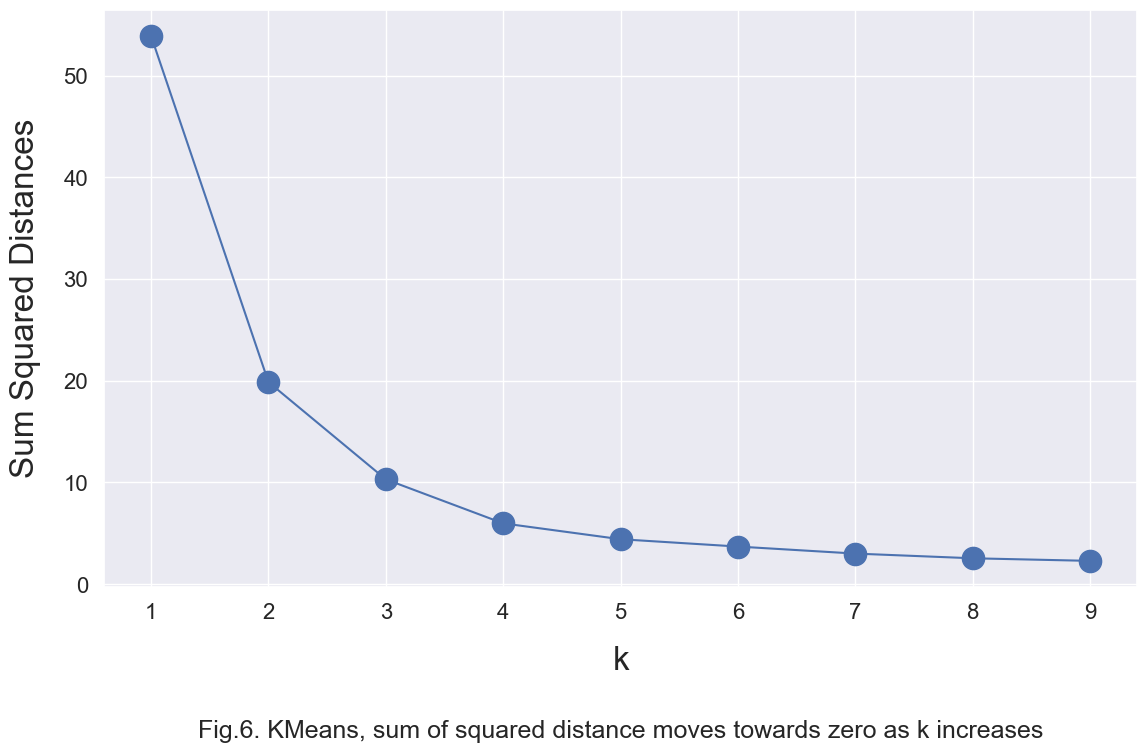

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Define the feature space
xi = df[['TAX', 'DIS']]

mms = MinMaxScaler()
mms.fit(xi)
data_transformed = mms.transform(xi)

# Find the optimal k value for the feature
sum_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_squared_distances.append(km.inertia_)

# As k increases, the sum of squared distance tends to zero.
# Imagine setting k to its maximum value n (where n is number of samples)
# each sample would form its own cluster meaning sum of squared distances is zero

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(K, sum_squared_distances, markersize=16, marker='o')
ax.set_xlabel('k', size=24, labelpad=16)
ax.set_ylabel('Sum Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". KMeans, sum of squared distance moves towards zero as k increases"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-optimal-kvalue.png', bbox_inches='tight')

plt.show; # elbow is at k=3, indicating the optimal k is 3

# Initialize centroids to shuffle and randomly select K data points without replacement.
As you see there is no training and testing data split. There is also no target variable (y), so the outcome is unknown.  As a part of the unsupervised learning method, clustering attempts to identify a relationship between n-observations (data points) without being trained by the response variable.

A K-method clustering function is performed by executing the code block on an x2d-dimensional feature space consisting of the DataFrame df's 'TAX' and 'DIS' functions. Each information point is given a cluster label before the K-way model with three clusters (n_clusters=three) is fitted to the statistics. The clusters are then displayed in a scatter plot. The cluster facilities (centroids), which are represented by black markers, are shown on the plot with the record factors coloured according to their assigned clusters. According to the caption and distinguish text, the K-approach identifies three natural clusters in the data based on the proximity of data points in the characteristic space. The output is a scatter plot that displays the K-approach clustering outcome on a two-dimensional characteristic space (x2d) that contains the 'TAX' and 'DIS' capabilities from the DataFrame df. The scatter plot's facts factors are each coloured according to the cluster label to which it has been assigned, and the black markers denote the cluster centres (centroids). The plot shows the naturally occurring clustering patterns of the record factors based entirely on the proximity in their 'TAX' and 'DIS' feature values, and it suggests that K-means successfully identifies three fantastic clusters in the data.

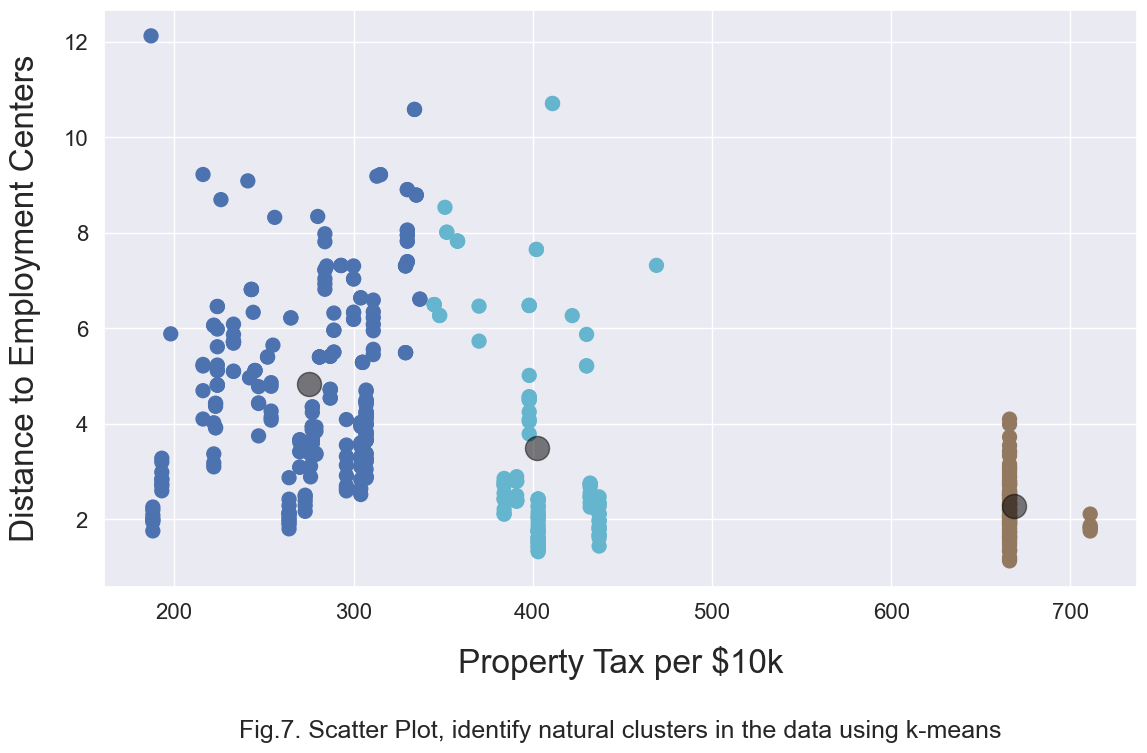

In [39]:
# Define the feature
x2d = xi.values

# Define the model
model = KMeans(n_clusters=3)

# Fit the model
model.fit(x2d)

# Assign a cluster to each example
labels = model.predict(x2d)

# Retrieve unique clusters
clusters = np.unique(labels)

import matplotlib
get_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
colors = [color for color in get_colors]

fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(x2d[:, 0], x2d[:, 1], c=labels, 
           cmap=matplotlib.colors.ListedColormap(colors), s=100)

centers = model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using k-means"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-proximity-centers.png', bbox_inches='tight')

# Show the plot
plt.show();

# K-means identifies three natural clusters from these two features

# Compute the sum of squared distance between data points and all centroids
The code block below calculates the squared distance of every facts point to its assigned cluster center after applying K-method clustering. It then creates a DataFrame df to keep those squared distances in conjunction with their cluster labels. The code plots the sum of squared distances for each information point, looked after in descending order, to pick out ability outliers inside the data. The pinnacle five outliers, represented by the most important sum of squared distance values, are displayed within the x_outliers DataFrame. The caption and parent text provide an explanation for that the pinnacle outlier applicants are probably in cluster 1 (recognized as blue dots within the previous scatter plot), and they have the biggest sum of squared distance values amongst all facts points, indicating their severe distance from their assigned cluster center. The output is a plot displaying the sum of squared distances for every records factor inside the K-approach clustering version. It enables to discover potential outliers, with the top 5 outliers indexed within the x_outliers DataFrame. These outliers have the largest sum of squared distance values, indicating their giant distance from their respective cluster facilities, and are likely positioned in cluster 1 based on the cluster assignments from the K-means algorithm.

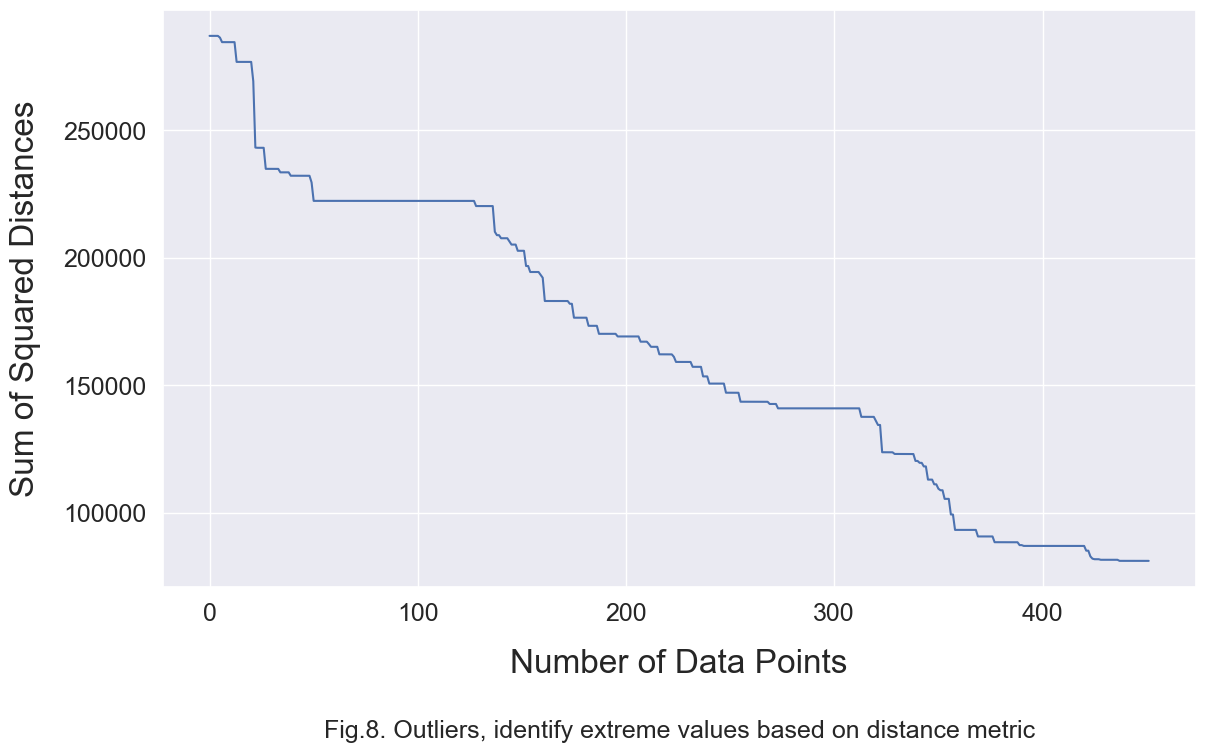

,sqdist,label
435,287123.05,1
434,287122.37,1
436,287122.35,1
437,287121.89,1
438,287119.65,1


In [40]:
# Square distance to cluster center
x_dist = model.transform(xi) ** 2
df = pd.DataFrame(x_dist.sum(axis=1).round(2), columns=['sqdist'])
df['label'] = labels

# Plot distance to identify outliers
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(np.arange(0, len(df['sqdist'])), df['sqdist'].sort_values(ascending=False))
ax.set_xlabel('Number of Data Points', size=24, labelpad=16)
ax.set_ylabel('Sum of Squared Distances', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=18, length=8)

# Add caption
fignum += 1
figtxt = ". Outliers, identify extreme values based on distance metric"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-kmeans-distances-proximity.png', bbox_inches='tight')

plt.show();

x_outliers = df.sort_values(['sqdist', 'label'], ascending=[0,1])[0:5]
x_outliers # these rows are 5 top outliers based on distance

# The top outlier candidates appear to be in cluster 1 (blue dots in chart above)
# Top outliers have the largest sum of squared distance values

# Assign each data point to the closest cluster (centroid)
The code block uses the Nearest Neighbours algorithm with n_neighbors=2 to determine how far each information point is from its nearest neighbour. The top of the line price for epsilon, the distance threshold used in DBSCAN clustering, is then determined by sorting the distances in ascending order and plotting them. The point of greatest curvature in the plot, which in this case is found to be at a distance of 25, corresponds to the gold standard epsilon fee. The most important parameter for using DBSCAN clustering on the statistics is thought to be this price.The output is a plot displaying the sorted distances from every statistics point to its closest neighbor. It enables discover the most advantageous value for the epsilon parameter within the DBSCAN clustering algorithm. The most beneficial epsilon fee is determined at the point of maximum curvature inside the plot, which is located to be at a distance of 25. This value may be used as the threshold for appearing DBSCAN clustering on the dataset.

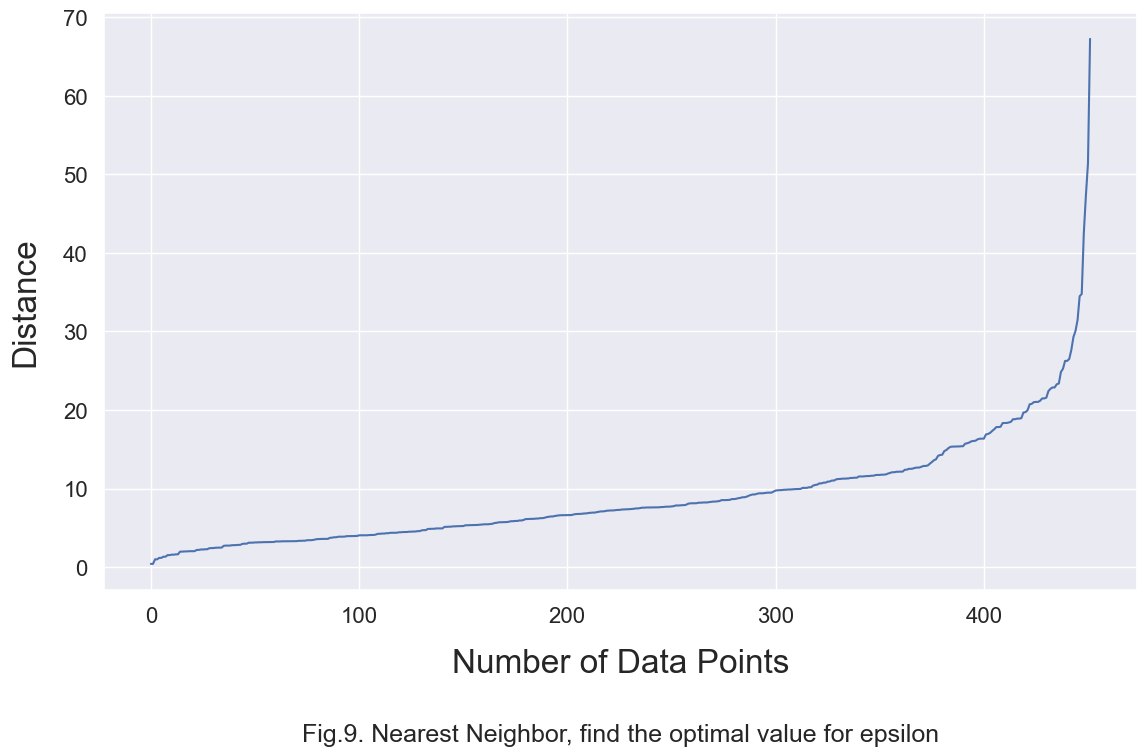

In [41]:
# Calculate the distance from each point to its closet neighbor 
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# distances is array that contains the distance to the closest n_neighbors
# indices is array that contains the index for each of those points

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot distances
fig,ax = plt.subplots(figsize=(13.33, 7.5))
ax.plot(distances)
ax.set_ylabel('Distance', size=24, labelpad=16)
ax.set_xlabel('Number of Data Points', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Nearest Neighbor, find the optimal value for epsilon"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-optimal-eps.png', bbox_inches='tight')

plt.show();

# Optimal value for epsilon is at point of max curvature, distance = 25

# DBSCAN is another unsupervised learning algorithm. Again, notice, there are no training and testing datasets.
Compute the centroids for the clusters by taking the average of all the data points that belong to each cluster

The code block below makes use of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to pick out clusters inside the data. It fits the DBSCAN model with an epsilon value of 25 and a minimal range of samples of 5. The DBSCAN set of rules assigns cluster labels to each data point and also marks ability outliers as noise factors (labeled as -1). The code then plots the facts points, in which distinct colors represent different clusters, and the 'black' color represents ability outliers. The caption and determine text explain that DBSCAN identifies more herbal clusters (8 clusters) compared to K-approach (three clusters), and it marks information points labeled with -1 as potential outliers. The output is a scatter plot showing data points from two features ("Property Tax per $10k" and "Distance to Employment Centers") using DBSCAN clustering. The plot visualizes the natural clusters identified by DBSCAN, each represented by a different color, and highlights potential outlier data points in black, which do not belong to any cluster (-1 label).


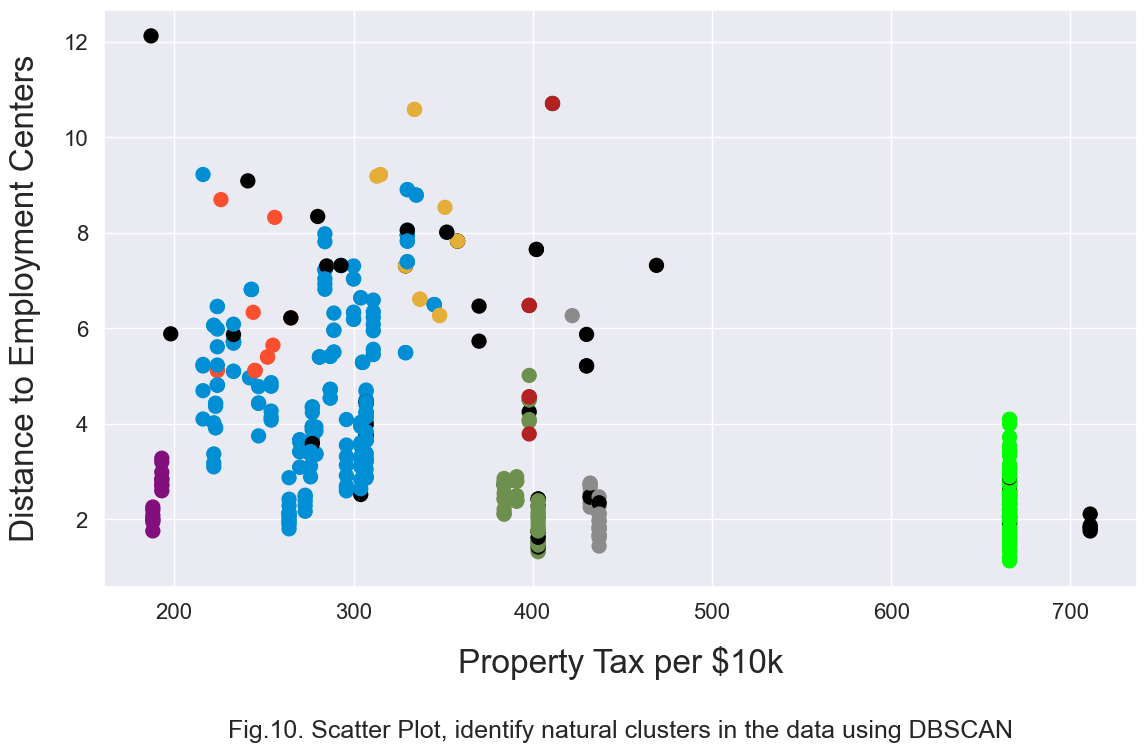

In [43]:
# Identify Noise Points from DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=25, min_samples=5) # min points based on domain knowledge
labels = dbscan_model.fit_predict(X) # train the model with eps and min_samples

# Map clusters to colors
colors = (['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'] + ['firebrick', 'lime', 'black']) # account for all clusters
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

fig, ax = plt.subplots(figsize=(13.33, 7.5))
ax.scatter(x2d[:, 0], x2d[:, 1], c=vectorizer(labels), cmap=matplotlib.colors.ListedColormap(colors), s=100)

ax.set_xlabel('Property Tax per $10k', size=24, labelpad=16)
ax.set_ylabel('Distance to Employment Centers', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add Caption
fignum += 1
figtxt = ". Scatter Plot, identify natural clusters in the data using DBSCAN"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-dbscan-proximity.png', bbox_inches='tight')

plt.show()

# DBSCAN identifies more natural clusters than k-means (8 vs 3)
# Data points with 'black' color are considered potential outliers (label as -1)


# Baseline Model with Linear Regression
The model performance will be evaluated using the following two metrics:

R^2 (R squared) is the proportion of the variance in the dependent variable (y) that is explained (or predictable) from the independent variables (X).

RMSE (root mean squared error) is a quadratic scoring rule that measures the average magnitude of the error. RMSE is the square root of the average squared differences between prediction and actual observation. The closer to zero, the better.

The code uses a scikit-learn baseline linear regression implementation. It divides the data into education and check sets before applying fact preprocessing by scaling the numeric functions with StandardScaler. The linear regression version is then trained on the preprocessed data, and its performance is assessed on the test set using R-squared (R2) and root mean square errors (RMSE) metrics.
The output below defines the performance of the baseline linear regression model on the test data. It includes the R-squared (R^2) value, which measures the proportion of variance in the target variable explained by the model, and the root mean squared error (RMSE), which quantifies the average prediction error. From these metrics we can easily assess how well the model fits the test data and how accurate its predictions are.

In [44]:
# Import machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Declare data preprocessing steps
numeric_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# categorical_features = [None]
# categorical_transformer = Pipeline(steps=[
#                             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#                             ])

preprocessor = ColumnTransformer(transformers=[
                ('num', numeric_transformer, numeric_features)
#                 ('cat', categorical_transformer, categorical_features)
                ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LinearRegression())
                          ])
 
# Tune model using cross-validation pipeline
clf = pipeline 
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('-----Baseline Model Performance-----')
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (361, 13) (361, 13)
-----Baseline Model Performance-----
R^2: 0.988199761031772
RMSE: 0.31790228175953256


The baseline model with Linear Regression identified and removed 0 outliers, and the model achieved an R^2 of 98.82 and RMSE of 0.32.

# Isolation Forest
Isolation Forest, or iForest, is built on the basis of decision trees. Partitions are created in these trees by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature. Since outliers (in theory) are less frequent and different in terms of values than normal observations, fewer splits should be required to identify these abnormal points. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data and has a default value of 0.1.

The code below is using the Isolation Forest set of rules to pick out outliers within the training dataset. It then removes these outliers and retrains the linear regression version using the updated schooling statistics. Finally, it evaluates the performance of the up to date model at the take a look at facts using the R-squared (R^2) cost and root imply squared errors (RMSE) metrics, which measure how nicely the version fits the check records and the accuracy of its predictions. The output below after executing defines the performance of the linear regression model after removing outliers from the training data using the Isolation Forest algorithm. It provides the R-squared (R^2) value, which indicates how well the model fits the test data (closer to 1 is better), and the root mean squared error (RMSE), which measures the accuracy of the model's predictions (lower values are better).

In [45]:
from sklearn.ensemble import IsolationForest



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (325, 13) (325, 13)
R^2: 0.9869874815312886
RMSE: 0.3338327371982902


Isolation Forest identified and removed 36 outliers, but the model only achieved an R^2 of 98.75 and RMSE of 0.33.

# Minimum Covariance using Elliptic Envelope
Minimum Covariance Determinant, or MCD, generalizes the assumption that input variables have a Gaussian distribution. Rather than applying simple statistical methods to a single input variable, MCD defines a multi-dimensional Gaussian feature space to identify values outside of the shape. The algorithm provides the "contamination" argument that defines the expected ratio of outliers in the data.

The code below is performing the outlier detection and elimination using the Elliptic Envelope set of rules. It identifies outliers in the dataset and removes them by choosing all rows that are not outliers. The model is then trained on the up to date training dataset, and its performance is evaluated at the check records the usage of the R-squared (R^2) value and the root mean squared error (RMSE). After outliers have been identified and eliminated using the Elliptic Envelope algorithm, the output identifies the R-squared (R2) value and the root mean squared error (RMSE) as performance metrics of the model on the test data. While the RMSE calculates the average difference between the predicted values and the actual values in the test data, the R-squared value indicates the percentage of the variance in the target variable that is predictable from the input features.

In [46]:
from sklearn.covariance import EllipticEnvelope



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (357, 13) (357, 13)
R^2: 0.987961452884546
RMSE: 0.32109628603570456


Minimum Covariance Determinant identified and removed 5 outliers, and the model achieved an R^2 of 98.80 and RMSE of 0.32.

# Local Outlier Factor (LOF)
LOF is a model that attempts to leverage the concept of nearest neighbors for outlier detection. Each observation is assigned a score of how isolated or how likely it is to be an outlier based on the size of its local neighborhood. LOF provides the "contamination" argument, which is the expected percentage of outliers in the dataset and defaults to 0.1.

The Local Outlier Factor (LOF) algorithm is used in the code below to find outliers in the training dataset. After locating the outliers, it eliminates them from the training dataset before updating the training data and running a machine learning model (specified in the pipeline) on it. Finally, using metrics such as R-squared (R2) and root mean square error (RMSE), the code assesses how well the trained model performed on the test data.


# The output of the code will provide the following information as shown below
The original shape of the training dataset (number of samples, number of features) before removing outliers.
The updated shape of the training dataset after removing outliers.
The R-squared (R^2) and root mean squared error (RMSE) metrics indicating the performance of the machine learning model on the test data.

In [49]:
from sklearn.neighbors import LocalOutlierFactor


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Select all rows that are not outliers

mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (318, 13) (318, 13)
R^2: 0.9836954968516617
RMSE: 0.3736818706866313


LOF identified and removed 3 outliers, but the model only achieved an R^2 of 98.37 and RMSE of 0.37.

# Support Vector Machine
SVM algorithm is primarily used for binary classification problems, but it can also be used for one-class classification to identify outliers. One Class SVM provides the "nu" argument to specify the approximate ratio of outliers in the dataset and a default value of 0.1.

In the below code The data is divided into training and test sets. By doing the use of the One-Class SVM (Support Vector Machine) algorithm, it locates outliers in the training dataset.
The outlier data points are taken out of the training dataset, the machine learning model is adjusted using a cross-validation pipeline, and the performance of the model on the test data is assessed using R-squared (R2) and root mean squared error (RMSE) metrics.

 After using the One-Class SVM algorithm to remove outliers from the training dataset, the output clearly describes the performance of the machine learning model. It offers the root mean squared error (RMSE), which measures the model's prediction accuracy, and the R-squared (R2) value, which shows how well the model fits the data. These metrics helps us in determining how well the model predicts the test data.

In [51]:
from sklearn.svm import OneClassSVM


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the original training dataset
print('Original Shape: {} {}'.format(X_train.shape, y_train.shape))

# Identify outliers in the training dataset
osvm = OneClassSVM(nu=0.01)
yhat = osvm.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Tune model using cross-validation pipeline
clf = pipeline
clf.fit(X_train, y_train)

# Summarize the shape of the updated training dataset
print('Updated Shape: {} {}'.format(X_train.shape, y_train.shape))

# Evaluate model pipeline on test data
yhat = clf.predict(X_test)
print('R^2: {}'.format(r2_score(y_test, yhat)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))

Original Shape: (361, 13) (361, 13)
Updated Shape: (358, 13) (358, 13)
R^2: 0.9881972981996546
RMSE: 0.31793545477849194


One Class SVM identified and removed 3 outliers, but the model only achieved an R^2 of 98.88 and RMSE of 0.32.

# Plotting the outliers
You can see with the following code, there are some outliers in this dataset.

Let's look at some of the methods for detecting outliers. We will only use the Elliptic Envelope, Minimum Covariance Determinant, and OneClassSVM

By fitting an ellipse around the core data points, the Elliptic Envelope discovers outliers in a Gaussian distributed dataset. It is quite sensitive to the data's heterogeneous structure.

The Minimal Covariance Determinant focuses on the data distribution's major mode and also assumes the data is Gaussian distributed.

The One-Class SVM is an unsupervised outlier detection algorithm that does not presume a parametric data distribution and can fit more complex forms.

Using three different outlier detection algorithms—Elliptic Envelope, Minimum Covariance Determinant, and OneClass SVM—the mentioned code finds outliers on two different subsets of the Boston housing dataset. By highlighting the areas where outliers are found, it creates contour plots to visualise the decision functions of each algorithm. The code then plots the initial data points and the results of the outlier detection for each of the dataset's two subsets, displaying the discovered outliers and their classification by each algorithm.
The output of the below block is a collection of contour plots that displays the results of three different outlier detection algorithms (Elliptic Envelope, Minimum Covariance Determinant, and OneClass SVM) used on two subsets of the Boston housing dataset. The plots allow for visual comparison and identification of potential outliers in the dataset. They also display the original data points and highlight the regions where outliers are detected by each algorithm.

In [70]:
from sklearn.datasets import load_boston
X1 = load_boston()['data'][:, [8, 10]]  # RAD & pupil-teacher-ratio: accessibility to radial highways
X2 = load_boston()['data'][:, [5, 12]]  # RM & LSAT: percent lower stats of the population

# Define "classifiers" to be used
classifiers = {
    "Elliptic Envelope": EllipticEnvelope(support_fraction=1., #support_fraction = the proportion of points to be included in the support of the estimate
                                             contamination=0.261),
    "Minimum Covariance Determinant": EllipticEnvelope(contamination=0.261),
    "OneClass SVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}


# Outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
xx3, yy3 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):

    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])
   

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results
plt.figure(1)  
plt.title("Outlier detection on the boston housing dataset")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")





plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


The code performs outlier detection on the Boston housing dataset using three different classifiers: Elliptic Envelope, Minimum Covariance Determinant, and OneClass SVM. It creates two scatter plots with decision boundaries of the classifiers to visualize the detected outliers or abnormal data points. The first scatter plot shows the relationship between accessibility to radial highways (RAD) and pupil-teacher ratio by town, while the second scatter plot shows the relationship between the average number of rooms per dwelling (RM) and the percent lower status of the population (LSAT). Two scatter plots with the decision boundaries of three different outlier detection classifiers—Elliptic Envelope, Minimum Covariance Determinant, and OneClass SVM—applied to the Boston housing dataset are generated as the result of the code. The plots show the association between the town's pupil-teacher ratio and the town's ease of access to radial highways, as well as the association between the average number of rooms per home and the population's percentage of lower status. The dataset's potential outliers and abnormal data points can be found using the decision boundaries.

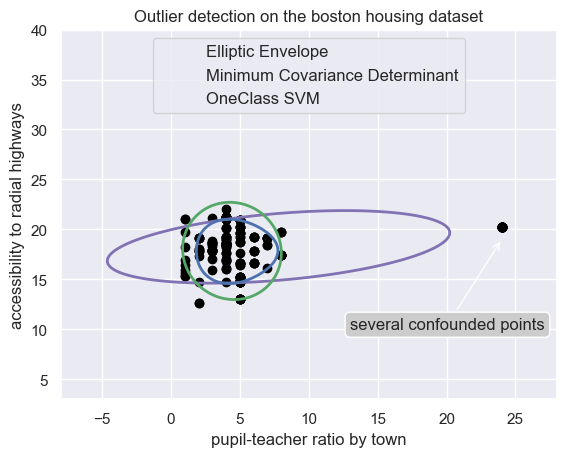

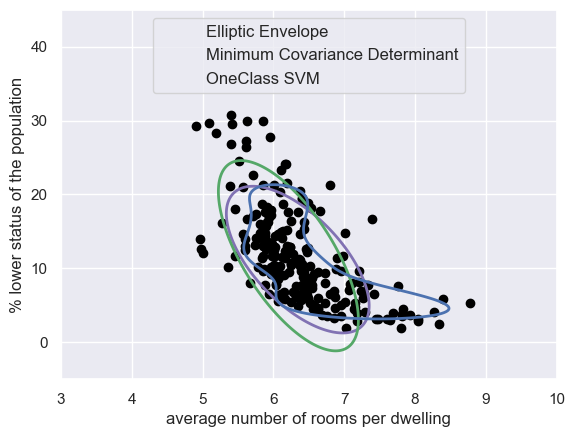

In [69]:
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

housingfile = ("housing boston.csv")
raw_df = pd.read_csv(housingfile, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 1]

X1 = data[:, [8, 10]]  # RAD & pupil-teacher-ratio: accessibility to radial highways
X2 = data[:, [5, 12]]  # RM & LSAT: percent lower stats of the population
y = target

# Define "classifiers" to be used
classifiers = {
    "Elliptic Envelope": EllipticEnvelope(support_fraction=1., contamination=0.261),
    "Minimum Covariance Determinant": EllipticEnvelope(contamination=0.261),
    "OneClass SVM": OneClassSVM(nu=0.261, gamma=0.05)
}

colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results
plt.figure(1)
plt.title("Outlier detection on the boston housing dataset")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()
